In [1]:
import os
import logging
import pandas as pd

from stellr import Population

In [2]:
scale = 'DR14_ASPC'
inputs = pd.read_csv(f'../../data/stellr/inputs_{scale}.csv')


# stars_results = pd.read_csv(f'stars_results/{scale}/stars/results.csv')  # Previous model results
stars_results = pd.read_csv(f'population_results/partial_pool/{scale}/population/stars/results.csv')

In [3]:
stars_results['bad_mlt'] = 0
stars_results.loc[stars_results['mlt_r_hat'] > 1.4, 'bad_mlt'] = 1
stars_results[stars_results['bad_mlt']==1]

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,bad_mlt


In [4]:
# data = inputs.merge(stars_results, on='name')
data = inputs.merge(stars_results.loc[stars_results['bad_mlt']==0], on='name')
data.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,bad_mlt
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,17858.512330,13154.182621,-0.289237,-0.021417,0.000537,0.000380,-0.158270,1.000391,0.071747,0
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,4650.253343,7769.248440,-0.400183,-0.176779,0.000871,0.000616,-0.288778,1.003328,0.059389,0
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,23847.152985,14297.525973,-0.348405,-0.171045,0.000288,0.000216,-0.258941,1.000188,0.047102,0
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,12561.920530,11745.948359,-0.264622,-0.003453,0.000625,0.000442,-0.135721,1.000509,0.070095,0
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,16514.915970,12391.079283,-0.424196,-0.162169,0.000522,0.000387,-0.288657,1.000336,0.070390,0


In [5]:
data = data.append(inputs.loc[inputs['name']=='KIC9025370'], ignore_index=True)
data.tail()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,bad_mlt
58,KIC8424992,5517.5083,128.72182,0.985946,0.029900,120.914,0.305,-0.095701,0.074718,4.340031,...,15658.376779,14648.571823,-0.211564,0.066113,0.000493,0.000415,-0.072765,1.000313,0.073519,0.0
59,KIC9266926,5781.6396,133.60810,2.231382,0.076240,75.081,1.458,-0.298283,0.071068,4.070394,...,17758.467647,14134.320695,-0.417977,-0.149020,0.000510,0.000381,-0.282632,1.000043,0.071849,0.0
60,KIC3735871,5960.3850,131.76004,1.366482,0.043845,122.856,0.472,-0.029106,0.075043,4.404094,...,12751.120628,13313.518219,-0.153679,0.113127,0.000603,0.000447,-0.022152,1.000605,0.071371,0.0
61,KIC11027406,5923.8970,136.09485,1.955169,0.069971,88.314,0.954,-0.208151,0.074160,4.173365,...,17385.434658,13147.979153,-0.330542,-0.053838,0.000560,0.000396,-0.192007,0.999990,0.073798,0.0
62,KIC9025370,5470.0390,114.72123,1.331269,0.052619,132.707,0.429,-0.021591,0.064973,4.415394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('Length = ', len(data))

Length =  63


In [7]:
observed = {
    'population/stars': data
}

In [8]:
pop = Population(name=scale, path='population_results/partial_pool', observed=observed)

logging.basicConfig(
    format='%(asctime)s: %(levelname)s: %(message)s', 
    filename=os.path.join(pop.savedir, 'pop.log'), 
    level=logging.INFO,
)

2020-08-25 15:35:10,910 stellr.models WARNING  Key 'population' not in observed keys, no observations for this level will be assumed


In [9]:
sample_kwargs = {
    'num_samples': 2000,
    'burn_in': 2000,
    'num_chains': 10,
    'xla': True,
    'adaptation_kwargs': {
        'target_accept_prob': 0.98,
    },
}

In [10]:
%%time
pop.fit(sample_kwargs=sample_kwargs)

2020-08-25 15:35:26,937 stellr.optimizer INFO     Fitting population for 2000 samples across 10 chains with 2000 burn in steps per chain.
2020-08-25 16:21:17,605 stellr.optimizer WARNING  The number of effective samples was less than 10% for 350 parameters.
2020-08-25 16:21:17,612 stellr.optimizer WARNING  The number of effective samples was less than 25% for 839 parameters.


CPU times: user 45min 26s, sys: 39.6 s, total: 46min 6s
Wall time: 46min 3s


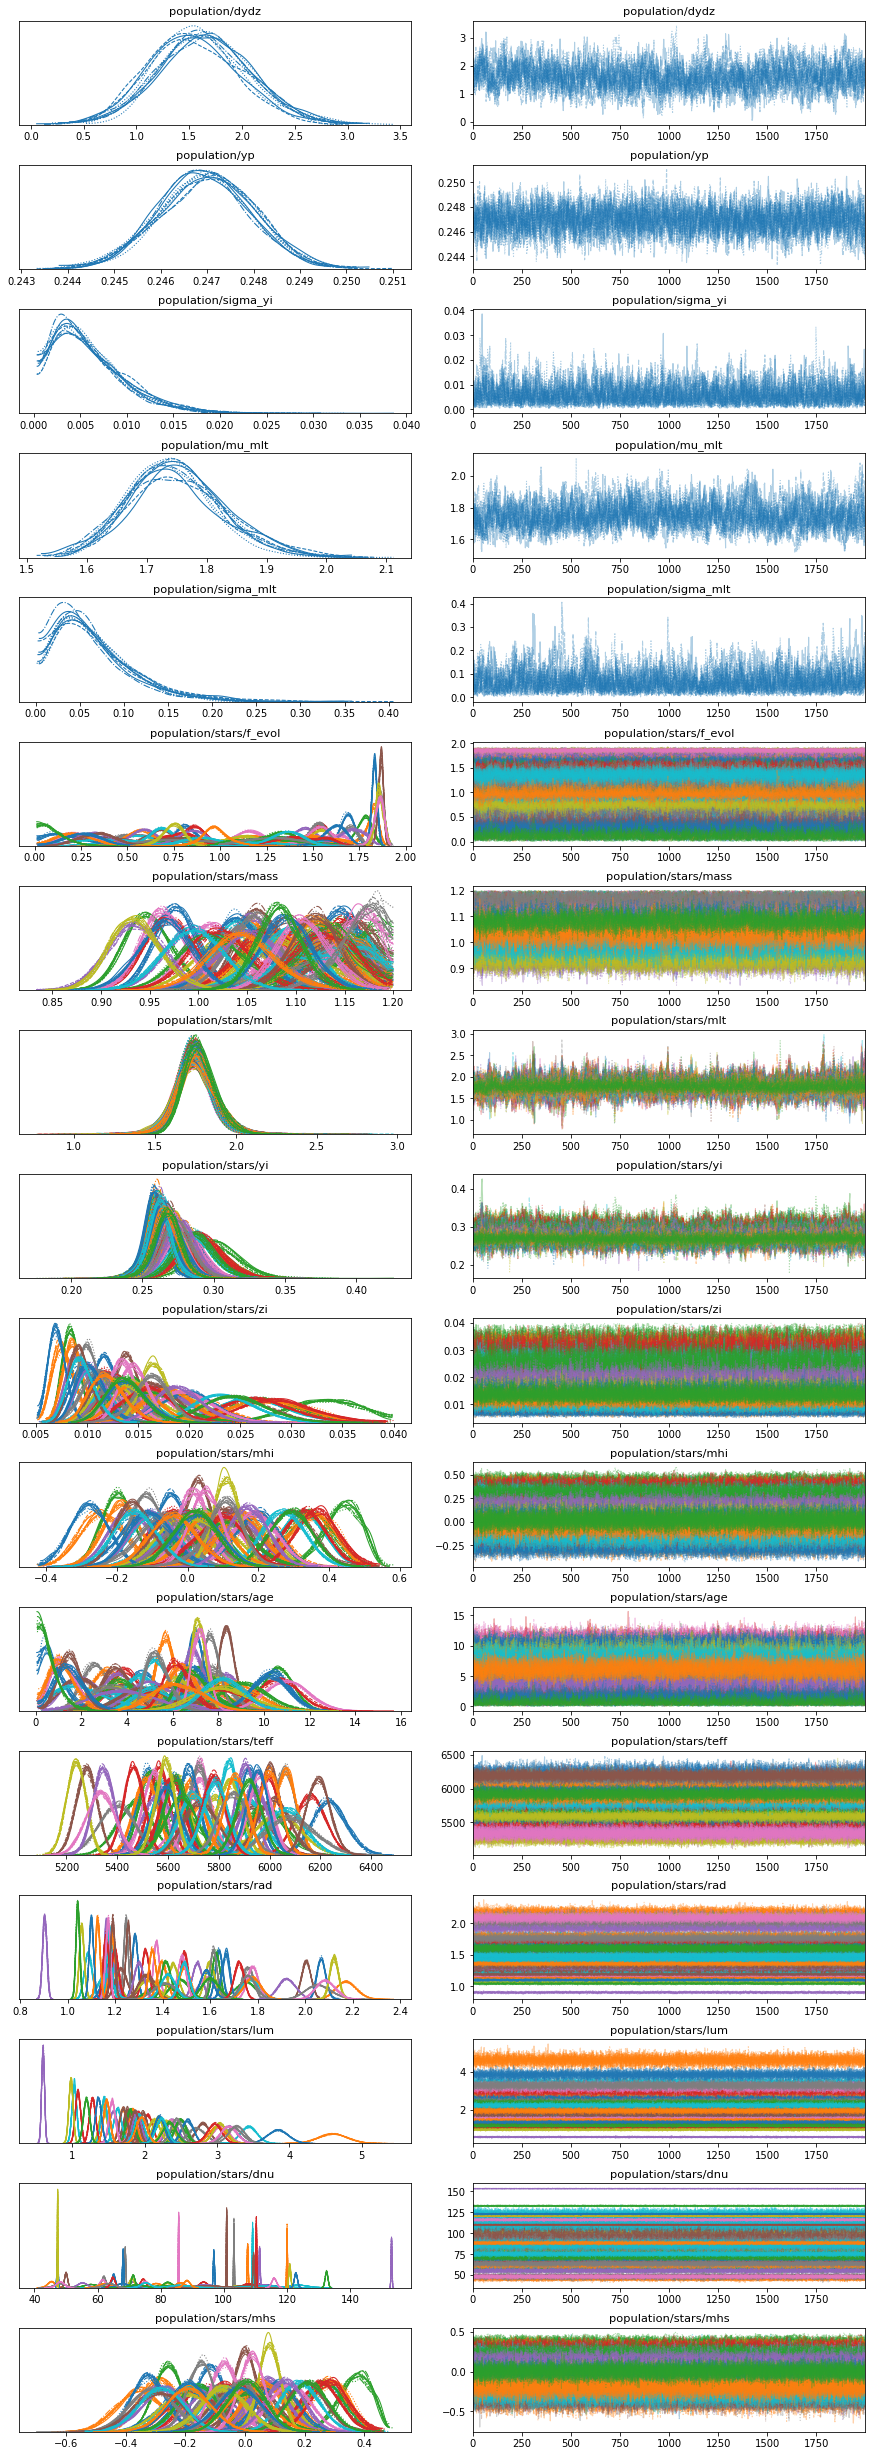

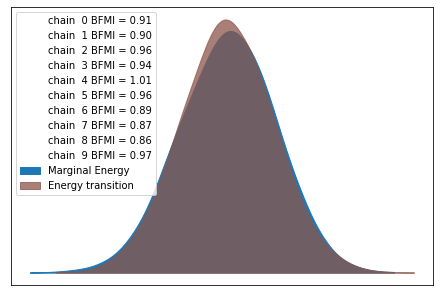

In [11]:
pop.plot_diagnostics(save=True);

In [12]:
pop.plot_corners(save=True)

In [23]:
df = pop.get_results()['population/stars']

In [24]:
df.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,0.739673,0.804346,0.860021,1906.132238,1924.718200,1916.137854,3942.354022,0.663708,0.923668,...,21987.408978,21987.408978,14121.078176,-0.288758,-0.023304,0.000484,0.000342,-0.158699,1.000366,0.071791
1,KIC3942719,1.773535,1.820631,1.846629,2920.488477,2764.729409,2764.729409,4778.145713,1.731482,1.875766,...,5906.082985,5832.161850,7456.690663,-0.405644,-0.181206,0.000778,0.000554,-0.290715,1.001446,0.059802
2,KIC4457351,1.729034,1.776261,1.812465,3775.243739,3528.880683,3528.880683,6398.616385,1.687979,1.847970,...,27342.570847,24668.334019,14872.057683,-0.343346,-0.165625,0.000285,0.000212,-0.258109,1.000187,0.047182
3,KIC3223000,0.153671,0.257973,0.377624,2419.619558,2453.738081,2453.738081,3738.020423,0.066458,0.476923,...,13063.515791,13063.515791,11933.841195,-0.264689,-0.008875,0.000604,0.000427,-0.137017,1.000642,0.069086
4,KIC7429287,1.378686,1.450483,1.514667,2266.715430,2229.866322,2229.866322,4668.408792,1.307755,1.576386,...,18694.322619,16708.992674,13260.828687,-0.418825,-0.156410,0.000514,0.000385,-0.288834,1.000233,0.070338


In [25]:
df = df.merge(inputs, on='name')

In [26]:
def compare_model_obs(var):
    ax = df.plot(
        kind='scatter', x=var, y=f'{var}_mean', alpha=0.8
    )
    ax.errorbar(df[var], df[f'{var}_mean'],
                xerr=df[f'{var}_err'], yerr=df[f'{var}_sd'],
                linestyle='none', linewidth=1.0, color='k', alpha=0.5, zorder=0)
    ax.plot([df[var].min(), df[var].max()], [df[f'{var}_mean'].min(), df[f'{var}_mean'].max()], 'k--')
    return ax

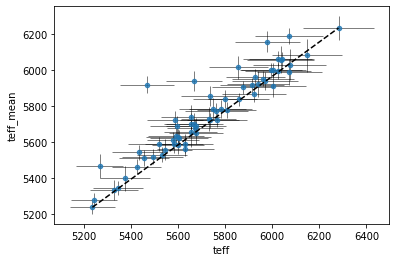

In [27]:
compare_model_obs('teff')

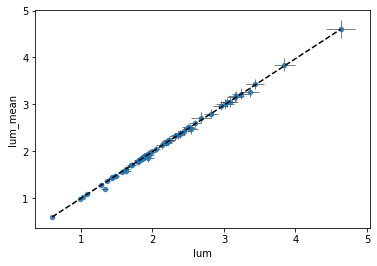

In [28]:
compare_model_obs('lum')

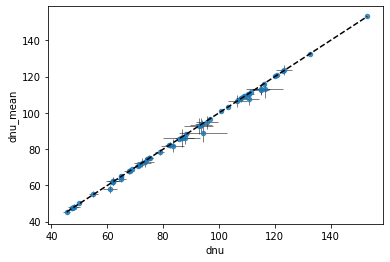

In [29]:
compare_model_obs('dnu')

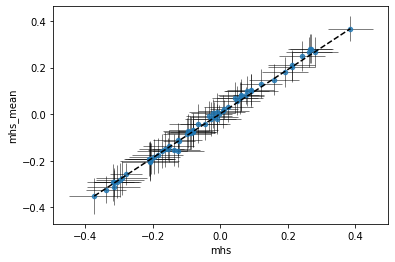

In [30]:
compare_model_obs('mhs')